In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Path to your SPSS file from soep repository
file_path = "/path/to/your/data/pl.sav"

# Specify columns to read
usecols = ['syear','pli0043_h', 'pid', 'pli0040', 'pli0049_h','ple0040', 'hid', 'pld0152','ple0008']

df1 = pd.read_spss(file_path, usecols=usecols)

# Downcast data types to reduce memory usage
df1[usecols] = df1[usecols].apply(pd.to_numeric, errors='coerce', downcast='float')

# Replace values less than 0 with NaN
df1 = df1.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Sort by 'pid' and then by 'syear'
df1 = df1.sort_values(by=['pid', 'syear'])

# Remove disabled individuals
df1 = df1[df1['ple0040'] != 1]

# Rename columns
df1.rename(columns={'pli0043_h': 'chores_hours', 'pli0040': 'errands_hours', 'pli0049_h': 'repairs_hours', 'pld0152': 'childbirth', 'ple0008': 'health'}, inplace=True)

# Filter for years between 2011 and 2021
df1 = df1[(df1['syear'] >= 2011) & (df1['syear'] <= 2021)]

# print(df1)

               pid        hid   syear  childbirth  health  ple0040  \
448220       602.0       60.0  2011.0         NaN     NaN      NaN   
476953       602.0       60.0  2012.0         NaN     NaN      NaN   
448221       901.0       94.0  2011.0         NaN     NaN      NaN   
476954       901.0       94.0  2012.0         NaN     NaN      NaN   
504936       901.0       94.0  2013.0         NaN     NaN      NaN   
...            ...        ...     ...         ...     ...      ...   
763218  55549002.0  5554900.0  2021.0         NaN     NaN      NaN   
763219  55560402.0  5556040.0  2021.0         NaN     NaN      NaN   
763220  55562402.0  5556240.0  2021.0         NaN     NaN      NaN   
763221  55564702.0  5556470.0  2021.0         NaN     NaN      NaN   
763222  55572102.0  5557210.0  2021.0         NaN     NaN      NaN   

        errands_hours  chores_hours  repairs_hours  
448220            1.0           2.0            1.0  
476953            1.0           4.0            1.0  


In [3]:
# LOAD the SOEP dataset
file_path = "/path/to/your/data/ppathl.sav"

use_cols = ['pid', 'sex', 'gebjahr', 'syear', 'hid']  # Add 'syear' to the columns to read
            
df2 = pd.read_spss(file_path, usecols=use_cols)

df2 = df2.drop_duplicates(subset=['pid', 'syear'])  # Consider duplicates for each survey year

# Calculate age based on survey year
df2['age_at_survey'] = df2['syear'] - df2['gebjahr']

# Filter for age between 24 and 62 at the time of the survey
df2_filtered_age = df2[(df2['age_at_survey'] >= 18) & (df2['age_at_survey'] <= 66)]

# filter syear from 2011 to 2021
df2_filtered_age = df2_filtered_age[(df2_filtered_age['syear'] >= 2011) & (df2_filtered_age['syear'] <= 2021)]

# make sex column responses 1 for  [1] Male 2 for [2] Female
# Assuming your DataFrame is df2_filtered_age
df2_filtered_age['sex'] = df2_filtered_age['sex'].replace({'[1] Male': 1, '[2] Female': 2})

# Display the filtered dataframe
print(df2_filtered_age)

#   load the SOEP dataset
file_path = "/path/to/your/data/hbrutto.sav"

use_cols = ['hid', 'syear', 'hhgr']

df3 = pd.read_spss(file_path, usecols=use_cols)

# Replace specific hhgr values with NaN
df3['hhgr'] = df3['hhgr'].replace({
    '[0] Terminated/untreated HH': np.nan,
    '[-1] No Answer': np.nan,
    '[-2] Does Not Apply': np.nan,
    '[-3] Answer Improbable': np.nan,
    '[-4] Inadmissible Multiple Answer': np.nan,
    '[-5] Not Contained In Questionnaire': np.nan,
    '[-6] Questionnaire Version With Modified Filtering': np.nan
})

# Downcast data types to reduce memory usage
df3[use_cols] = df3[use_cols].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Filter for years between 2011 and 2021
df3 = df3[(df3['syear'] >= 2011) & (df3['syear'] <= 2021)]

# Display the filtered dataframe
print(df3)

# Convert 'hid' and 'syear' to numeric types in both DataFrames
df2_filtered_age['hid'] = pd.to_numeric(df2_filtered_age['hid'], errors='coerce')
df2_filtered_age['syear'] = pd.to_numeric(df2_filtered_age['syear'], errors='coerce')

df3['hid'] = pd.to_numeric(df3['hid'], errors='coerce')
df3['syear'] = pd.to_numeric(df3['syear'], errors='coerce')

#merge df2 and df5 on hid
df_merge = df2_filtered_age.merge(df3, on= ['hid', 'syear'], how= 'outer')

print(df_merge)

# Merge the two DataFrames on 'pid'
df4 = df_merge.merge(df1, on= ['pid', 'syear'])
df4.reset_index(inplace=True)

# add chores_hours, errands_hours, repairs_hours to housework_hours
df4['avg_housework_per_day'] = df4['chores_hours'] + df4['errands_hours'] + df4['repairs_hours']

               hid         pid   syear sex  gebjahr  age_at_survey
189           60.0       602.0  2011.0   2   1958.0           53.0
190           60.0       602.0  2012.0   2   1958.0           54.0
191           60.0       602.0  2013.0   2   1958.0           55.0
214           60.0       603.0  2011.0   1   1946.0           65.0
215           60.0       603.0  2012.0   1   1946.0           66.0
...            ...         ...     ...  ..      ...            ...
1285057  5557210.0  55572102.0  2021.0   1   1994.0           27.0
1285058  5557620.0  55576202.0  2021.0   1   1989.0           32.0
1285059  5557630.0  55576302.0  2021.0   2   1992.0           29.0
1285060  5557890.0  55578902.0  2021.0   1   1993.0           28.0
1285061  5557950.0  55579502.0  2021.0   1   1999.0           22.0

[377960 rows x 6 columns]
            hid  syear  hhgr
263417       60   2011   3.0
263418       94   2011   1.0
263419      159   2011   1.0
263420      167   2011   1.0
263421      230   2011  

In [4]:
#create df5 with dropping columns ple0040, childbirth, health, gebjahr, 'hid_x', errands_hours, chores_hours, repairs_hours
df5 = df4.drop(columns=['ple0040', 'childbirth', 'health', 'gebjahr', 'hid_x', 'errands_hours', 'chores_hours', 'repairs_hours', 'index', 'hid_y'])
print(df5)

               pid   syear sex  age_at_survey  hhgr  avg_housework_per_day
0            602.0  2011.0   2           53.0   3.0                    4.0
1            602.0  2012.0   2           54.0   3.0                    6.0
2            901.0  2011.0   2           60.0   1.0                    6.0
3            901.0  2012.0   2           61.0   1.0                    7.0
4            901.0  2013.0   2           62.0   1.0                    7.0
...            ...     ...  ..            ...   ...                    ...
263791  55396001.0  2020.0   1           19.0   1.0                    NaN
263792  55396001.0  2021.0   1           20.0   1.0                    NaN
263793  55396601.0  2020.0   2           39.0   3.0                    NaN
263794  55402001.0  2020.0   1           32.0   2.0                    NaN
263795  55404001.0  2020.0   1           45.0   4.0                    NaN

[263796 rows x 6 columns]


C:\Users\purti\AppData\Local\Temp\ipykernel_16752\2479827626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sex'] = df_clean['sex'].map({1: 'Male', 2: 'Female'})


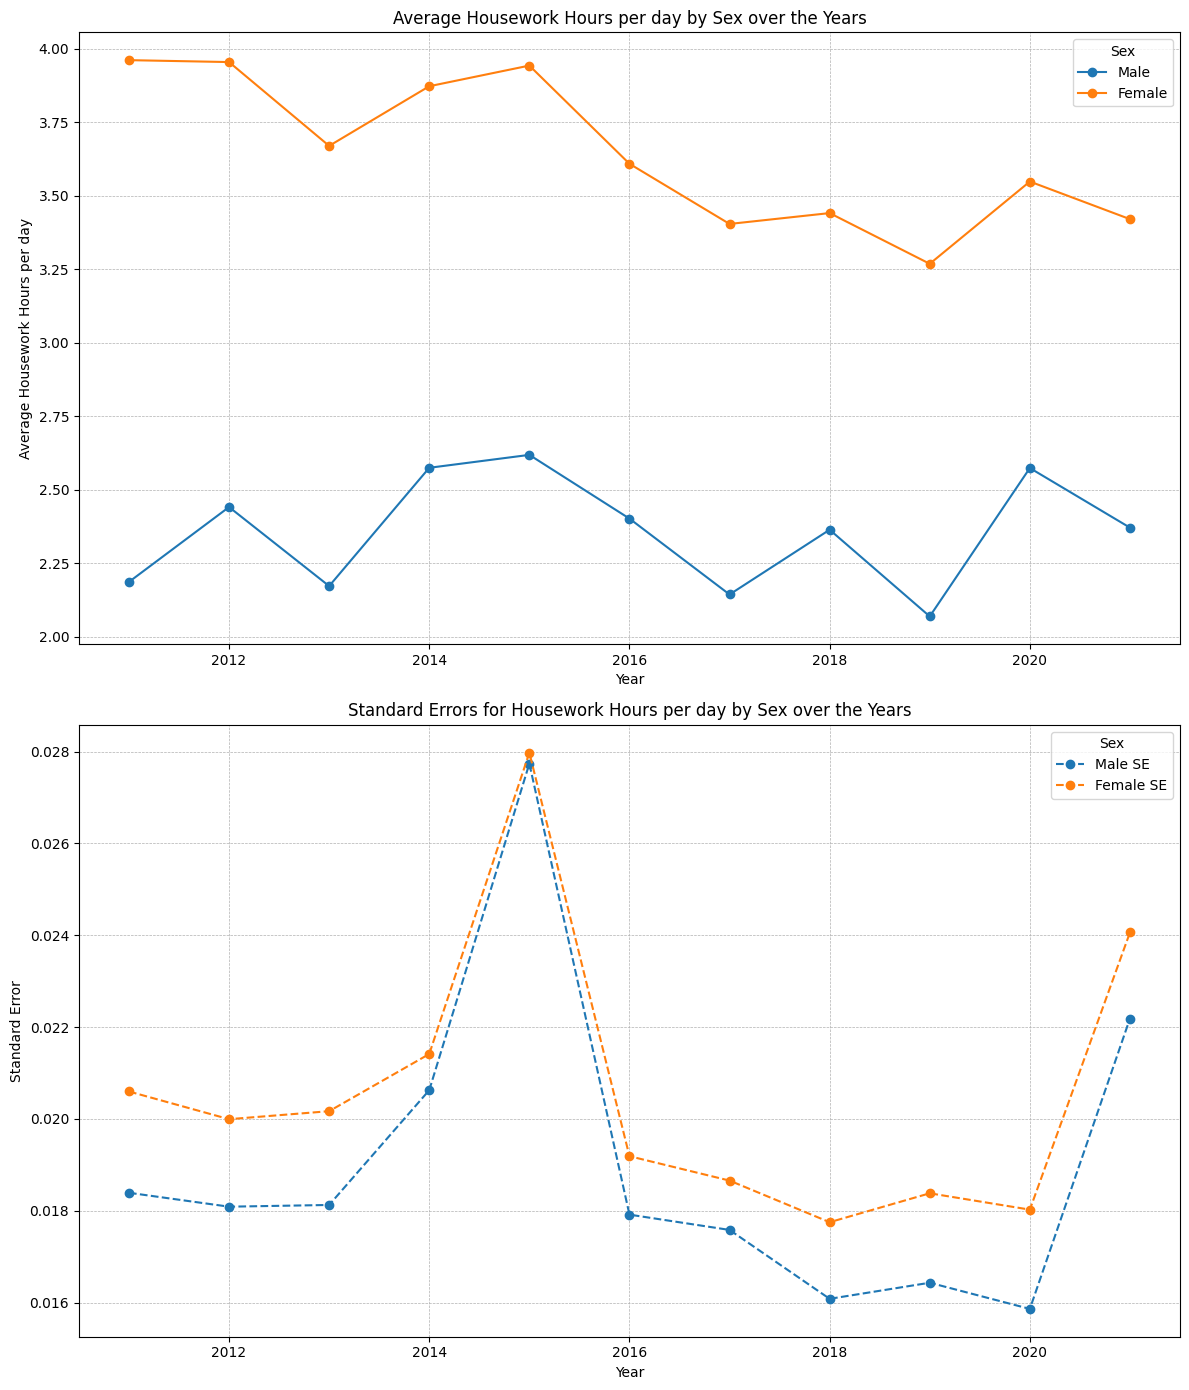

In [5]:
# plotting the average housework hours per day and standard errors over the years by gender

# Step 1: Clean data by dropping NaNs in 'avg_housework_per_day' and mapping sex values
df_clean = df5.dropna(subset=['avg_housework_per_day'])
df_clean['sex'] = df_clean['sex'].map({1: 'Male', 2: 'Female'})

# Step 2: Calculate the mean and standard error for avg_housework_per_day by year and sex
grouped_data = df_clean.groupby(['syear', 'sex'])['avg_housework_per_day'].agg(['mean', 'std', 'count']).reset_index()
grouped_data['se'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Step 3: Create a figure with two vertical subplots
plt.figure(figsize=(12, 14))

# Subplot 1: Plotting the average housework hours per day by sex over the years
plt.subplot(2, 1, 1)
for sex in ['Male', 'Female']:
    sex_data = grouped_data[grouped_data['sex'] == sex]
    plt.plot(sex_data['syear'], sex_data['mean'], label=sex, marker='o')
plt.title('Average Housework Hours per day by Sex over the Years')
plt.xlabel('Year')
plt.ylabel('Average Housework Hours per day')
plt.legend(title="Sex")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 2: Plotting the standard errors for each sex over the years
plt.subplot(2, 1, 2)
for sex in ['Male', 'Female']:
    sex_data_se = grouped_data[grouped_data['sex'] == sex]
    plt.plot(sex_data_se['syear'], sex_data_se['se'], label=f'{sex} SE', marker='o', linestyle='--')
plt.title('Standard Errors for Housework Hours per day by Sex over the Years')
plt.xlabel('Year')
plt.ylabel('Standard Error')
plt.legend(title="Sex")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


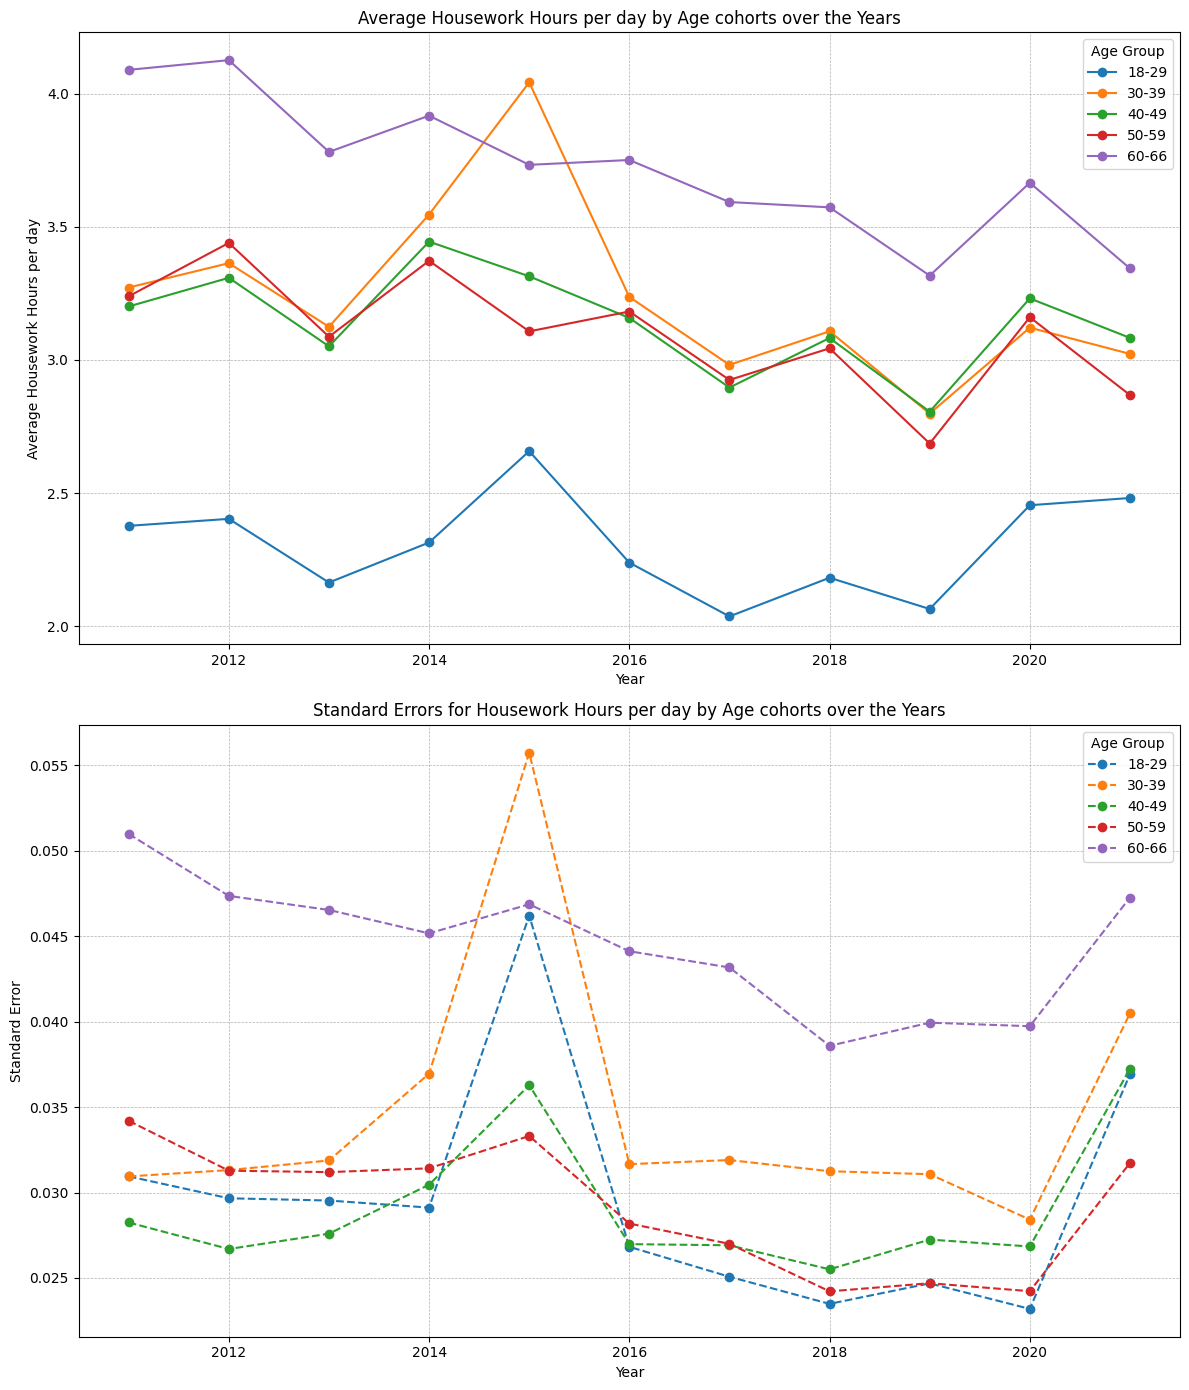

In [7]:
# plotting the average housework hours per day and standard errors over the years by age group

# Step 1: Create a copy of df5 to work with age groups
df_age_copy = df5.copy()

# Step 2: Define age cohorts using the specified bins and labels
age_bins = [18, 30, 40, 50, 60, 67]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-66']
df_age_copy['age_group'] = pd.cut(df_age_copy['age_at_survey'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Calculate the mean and standard error for avg_housework_per_day by year and age group
grouped_data_age = df_age_copy.groupby(['syear', 'age_group'])['avg_housework_per_day'].agg(['mean', 'std', 'count']).reset_index()
grouped_data_age['se'] = grouped_data_age['std'] / np.sqrt(grouped_data_age['count'])

# Step 4: Create a figure with two vertical subplots
plt.figure(figsize=(12, 14))

# Subplot 1: Plotting the average housework hours per day by age group
plt.subplot(2, 1, 1)
for age_group in age_labels:
    age_data = grouped_data_age[grouped_data_age['age_group'] == age_group]
    plt.plot(age_data['syear'], age_data['mean'], label=age_group, marker='o')
plt.title('Average Housework Hours per day by Age cohorts over the Years')
plt.xlabel('Year')
plt.ylabel('Average Housework Hours per day')
plt.legend(title="Age Group")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 2: Plotting the standard errors for each age group
plt.subplot(2, 1, 2)
for age_group in age_labels:
    age_data_se = grouped_data_age[grouped_data_age['age_group'] == age_group]
    plt.plot(age_data_se['syear'], age_data_se['se'], label=age_group, marker='o', linestyle='--')
plt.title('Standard Errors for Housework Hours per day by Age cohorts over the Years')
plt.xlabel('Year')
plt.ylabel('Standard Error')
plt.legend(title="Age Group")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


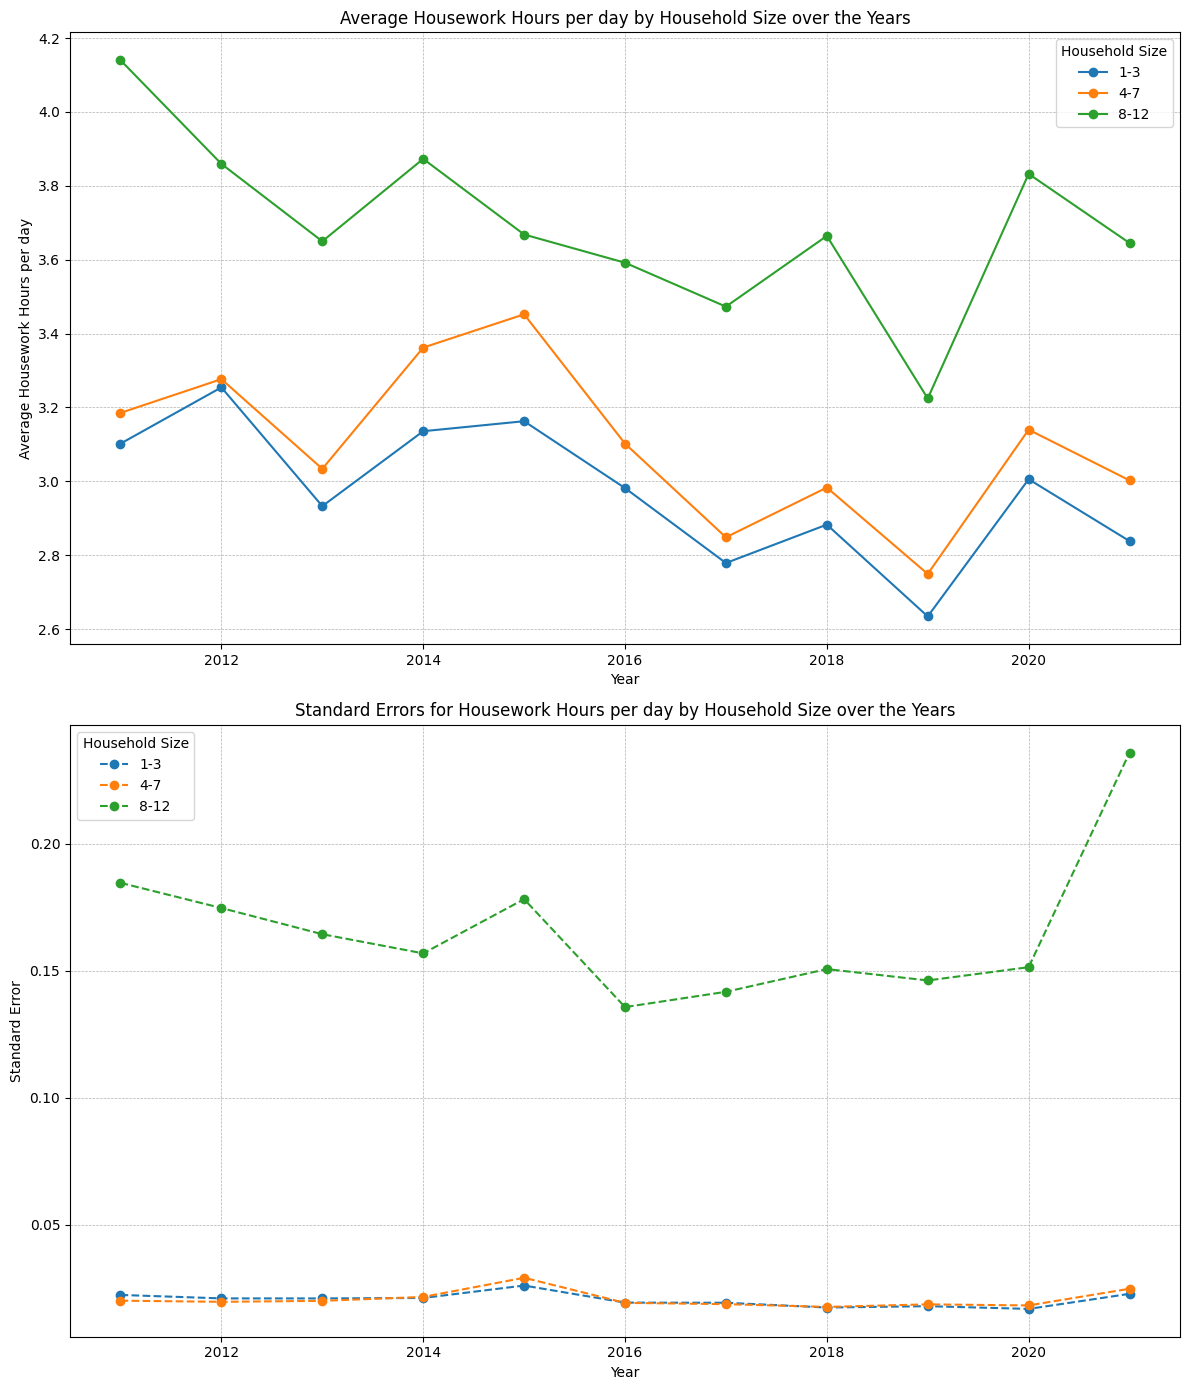

In [8]:
# plotting the average housework hours per day and standard errors over the years by household size 

# Step 1: Create a copy of df5 to work with household size groups
df_hhgr_copy = df5.copy()

# Step 2: Define household size cohorts using the specified bins and labels
hhgr_bins = [0, 3, 7, 12]
hhgr_labels = ['1-3', '4-7', '8-12']
df_hhgr_copy['hhgr_group'] = pd.cut(df_hhgr_copy['hhgr'], bins=hhgr_bins, labels=hhgr_labels, right=False)

# Step 3: Calculate the mean and standard error for avg_housework_per_day by year and household size group
grouped_data_hhgr = df_hhgr_copy.groupby(['syear', 'hhgr_group'])['avg_housework_per_day'].agg(['mean', 'std', 'count']).reset_index()
grouped_data_hhgr['se'] = grouped_data_hhgr['std'] / np.sqrt(grouped_data_hhgr['count'])

# Step 4: Create a figure with two vertical subplots
plt.figure(figsize=(12, 14))

# Subplot 1: Plotting the average housework hours per day by household size group
plt.subplot(2, 1, 1)
for hhgr_group in hhgr_labels:
    hhgr_data = grouped_data_hhgr[grouped_data_hhgr['hhgr_group'] == hhgr_group]
    plt.plot(hhgr_data['syear'], hhgr_data['mean'], label=hhgr_group, marker='o')
plt.title('Average Housework Hours per day by Household Size over the Years')
plt.xlabel('Year')
plt.ylabel('Average Housework Hours per day')
plt.legend(title="Household Size")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 2: Plotting the standard errors for each household size group
plt.subplot(2, 1, 2)
for hhgr_group in hhgr_labels:
    hhgr_data_se = grouped_data_hhgr[grouped_data_hhgr['hhgr_group'] == hhgr_group]
    plt.plot(hhgr_data_se['syear'], hhgr_data_se['se'], label=hhgr_group, marker='o', linestyle='--')
plt.title('Standard Errors for Housework Hours per day by Household Size over the Years')
plt.xlabel('Year')
plt.ylabel('Standard Error')
plt.legend(title="Household Size")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [9]:
#load csv file as dataframe to get education level
covariates_df = pd.read_csv("/path/to/your/directory/N.covariates.csv")

C:\Users\purti\AppData\Local\Temp\ipykernel_16752\3502439667.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  covariates_df = pd.read_csv(r"C:\Users\purti\Downloads\Thesis codes\N.covariates.csv")


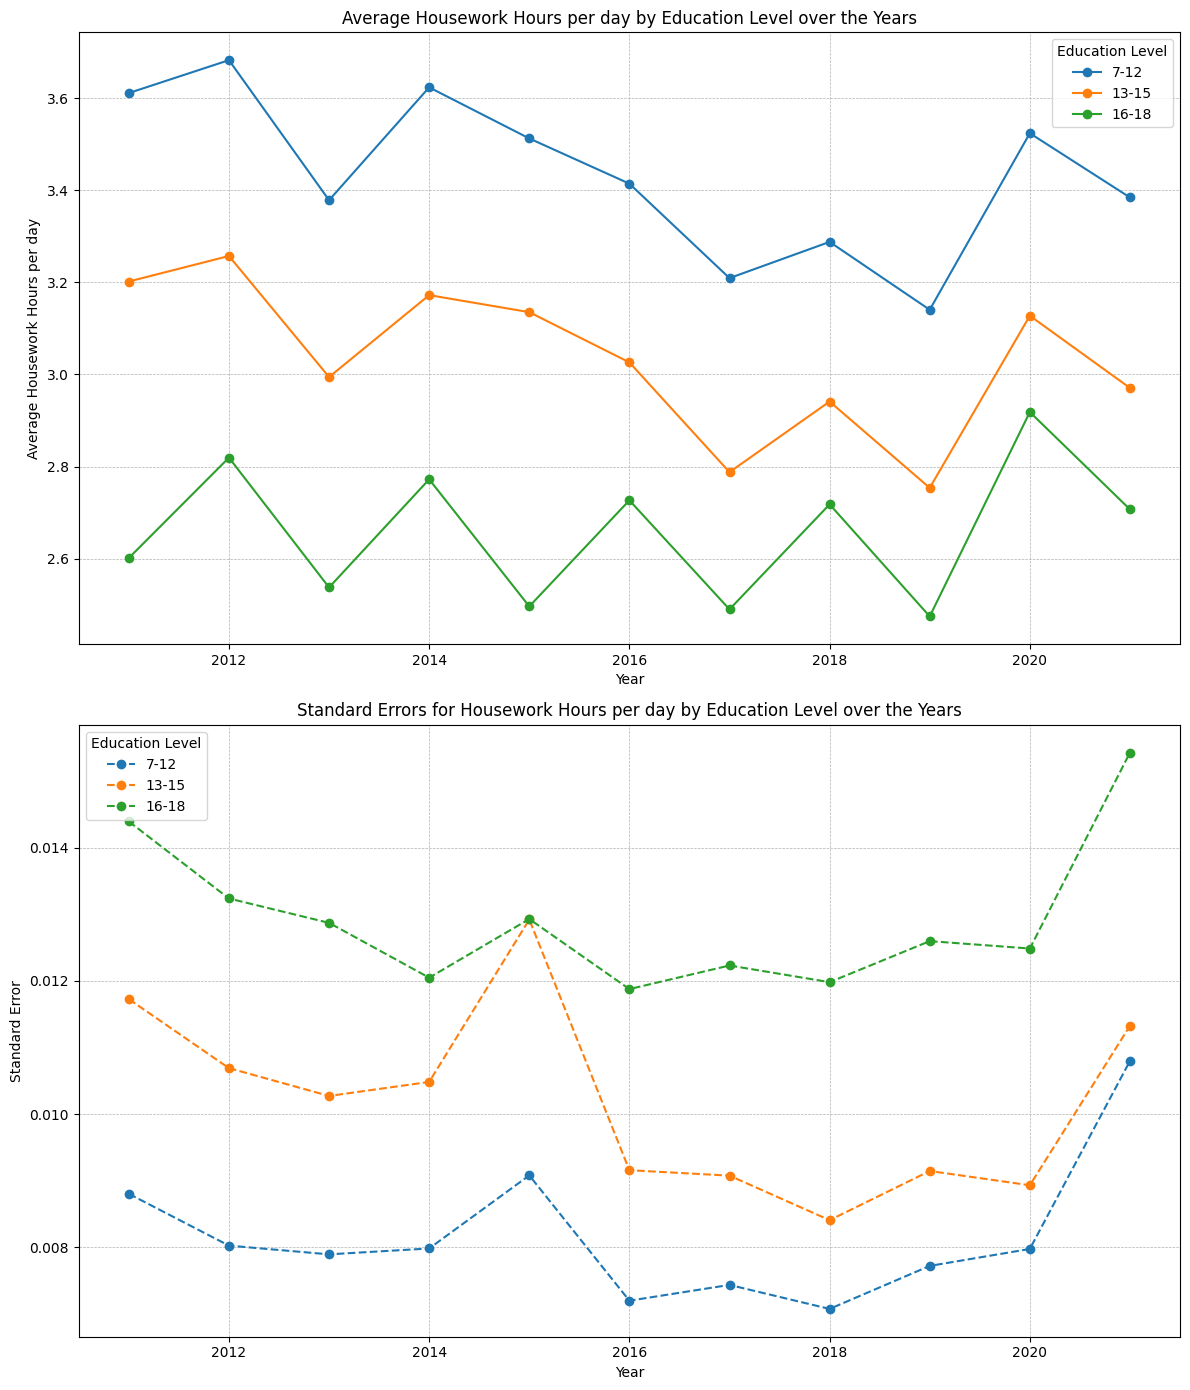

In [10]:
# plotting the average housework hours per day and standard errors over the years by education level

# Step 1: Merge df5 with covariates_df on a common identifier (e.g., 'pid')
merged_df = pd.merge(df5, covariates_df[['pid', 'education']], on='pid', how='left')

# Step 2: Create a copy of the merged DataFrame to work with education level groups
df_edu_copy = merged_df.copy()

# Step 3: Define education level cohorts using the specified bins and labels
education_bins = [6, 12, 15, 18]
education_labels = ['7-12', '13-15', '16-18']
df_edu_copy['education_group'] = pd.cut(df_edu_copy['education'], bins=education_bins, labels=education_labels, right=False)

# Step 4: Calculate the mean and standard error for avg_housework_per_day by year and education level group
grouped_data_edu = df_edu_copy.groupby(['syear', 'education_group'])['avg_housework_per_day'].agg(['mean', 'std', 'count']).reset_index()
grouped_data_edu['se'] = grouped_data_edu['std'] / np.sqrt(grouped_data_edu['count'])

# Step 5: Create a figure with two vertical subplots
plt.figure(figsize=(12, 14))

# Subplot 1: Plotting the average housework hours per day by education level group
plt.subplot(2, 1, 1)
for edu_group in education_labels:
    edu_data = grouped_data_edu[grouped_data_edu['education_group'] == edu_group]
    plt.plot(edu_data['syear'], edu_data['mean'], label=edu_group, marker='o')
plt.title('Average Housework Hours per day by Education Level over the Years')
plt.xlabel('Year')
plt.ylabel('Average Housework Hours per day')
plt.legend(title="Education Level")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Subplot 2: Plotting the standard errors for each education level group
plt.subplot(2, 1, 2)
for edu_group in education_labels:
    edu_data_se = grouped_data_edu[grouped_data_edu['education_group'] == edu_group]
    plt.plot(edu_data_se['syear'], edu_data_se['se'], label=edu_group, marker='o', linestyle='--')
plt.title('Standard Errors for Housework Hours per day by Education Level over the Years')
plt.xlabel('Year')
plt.ylabel('Standard Error')
plt.legend(title="Education Level")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
